In [1]:
import cv2
import os

import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from typing import List, Tuple

from labelmaker.consensus import VALID_LABEL_SPACES
from labelmaker.label_data import get_nyu40, get_scannet200, get_wordnet, get_ade150


In [2]:
SCENE_ID=47333462
# WORKSPACE_DIR = f'/home/weders/scratch/scratch/LabelMaker/arkitscenes/{SCENE_ID}'
WORKSPACE_DIR = '/scratch/quanta/Experiments/LabelMaker/arkit_test_scene'


In [3]:
# load all model folders
model_folders = [x for x in os.listdir(os.path.join(WORKSPACE_DIR, 'intermediate')) if x.split('_')[0] in VALID_LABEL_SPACES] 
if 'consensus' in os.listdir(os.path.join(WORKSPACE_DIR, 'intermediate')):
    model_folders.append('consensus')


In [4]:
print(model_folders)


['wordnet_groundedsam_1', 'nyu40_cmx_1', 'ade20k_internimage_1', 'scannet200_mask3d_1', 'wordnet_ovseg_1', 'consensus']


In [5]:
# load all images
image_files = sorted([Path(x).stem for x in os.listdir(os.path.join(WORKSPACE_DIR, 'color')) if x.endswith('.jpg')])


In [6]:
# visalization options
vis_freq = 200


In [7]:
COLOR_MAPS = {
    
    'ade20k': get_ade150,
    'scannet200': get_scannet200,
    'nyu40': get_nyu40,
    'wordnet': get_wordnet,
    'consensus': get_wordnet
}

def load_image(path: str) -> np.ndarray:
    """Load an image from the workspace.
    
    Args:
        image_id (str): image id
    
    Returns:
        np.ndarray: image
    """
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
  
  
def load_label(path: str) -> np.ndarray:
    """Load a label from the workspace.
    
    Args:
        label_space (str): label space
        image_id (str): image id
    
    Returns:
        np.ndarray: label
    """
    label = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    return label



def colorize_label(label: np.ndarray, label_space: str) -> np.ndarray:
    """Colorize a label image for visualization.
    
    Args:
        label (np.ndarray): label image
    
    Returns:
        np.ndarray: colorized label image
    """
    
    if label_space not in COLOR_MAPS:
        raise ValueError(f'Invalid label space: {label_space}')
    
    color_maps = COLOR_MAPS[label_space]()
        
    label = label.astype(np.uint8)
    
    label_colorized = np.zeros((label.shape[0], label.shape[1], 3), dtype=np.uint8)
    
    for ui in np.unique(label):
        label_colorized[label == ui] = color_maps[ui]['color']
        
    return label_colorized


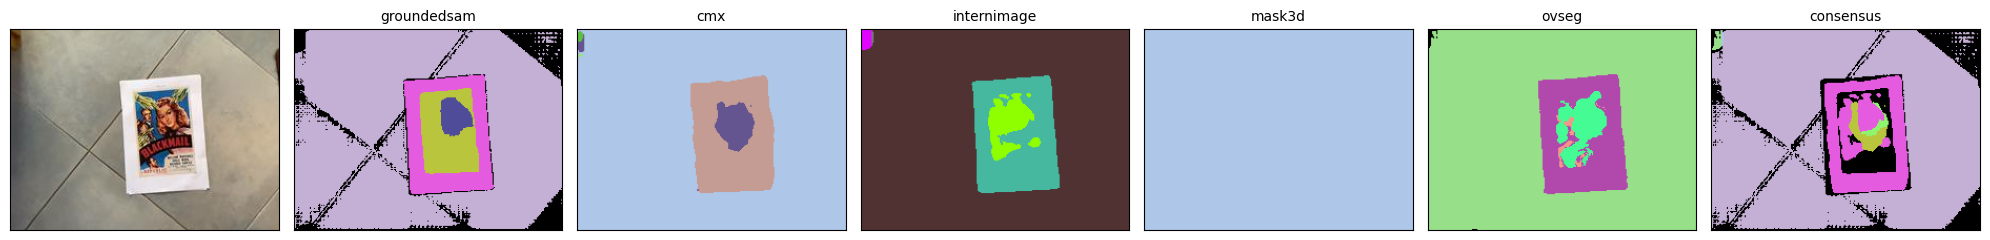

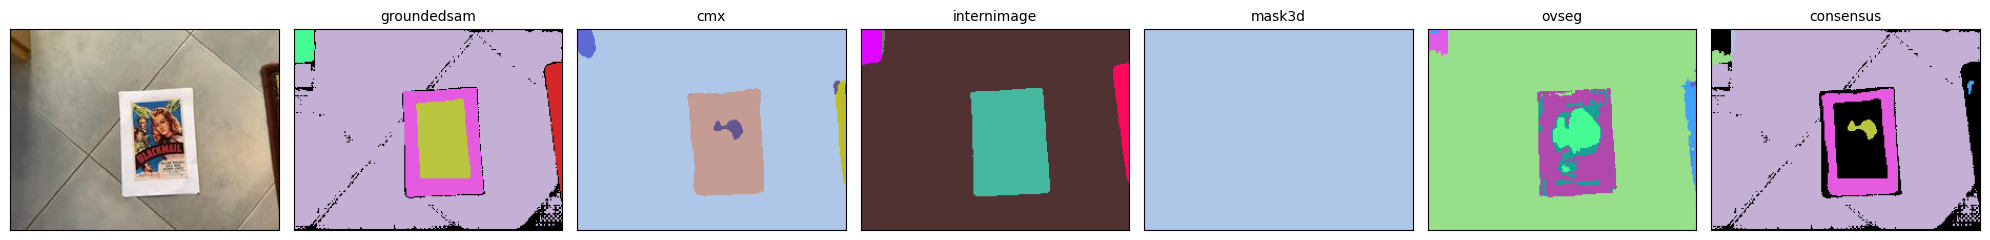

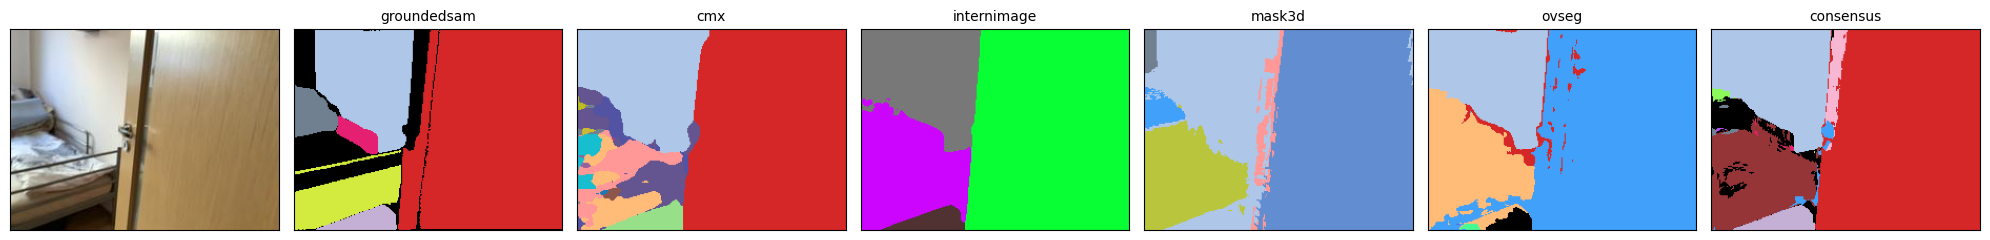

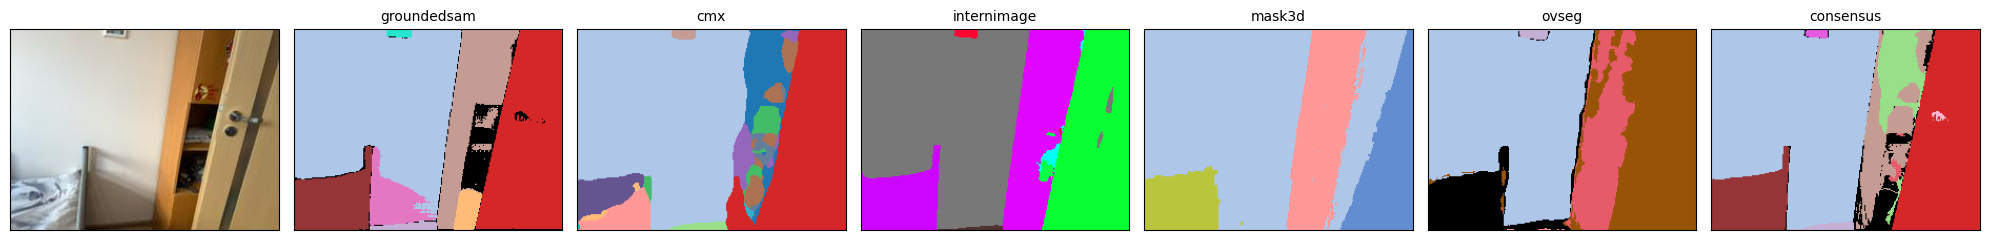

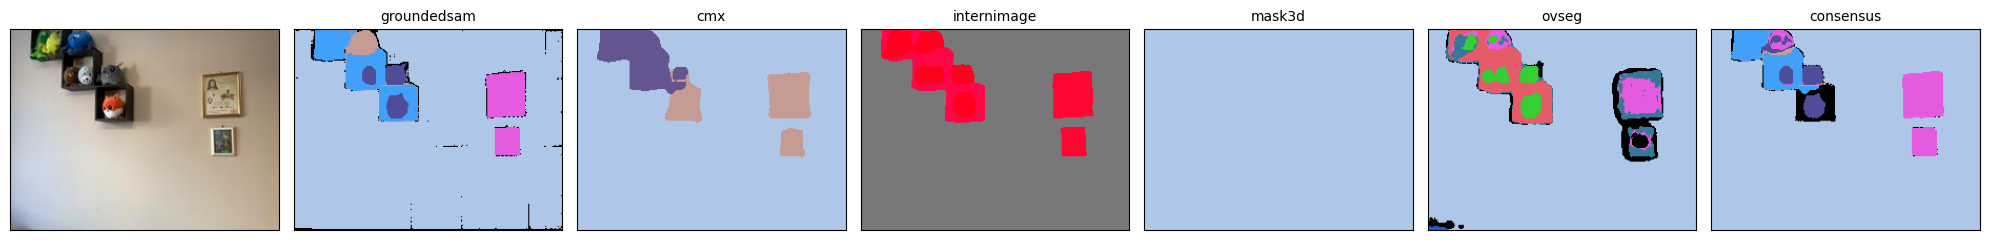

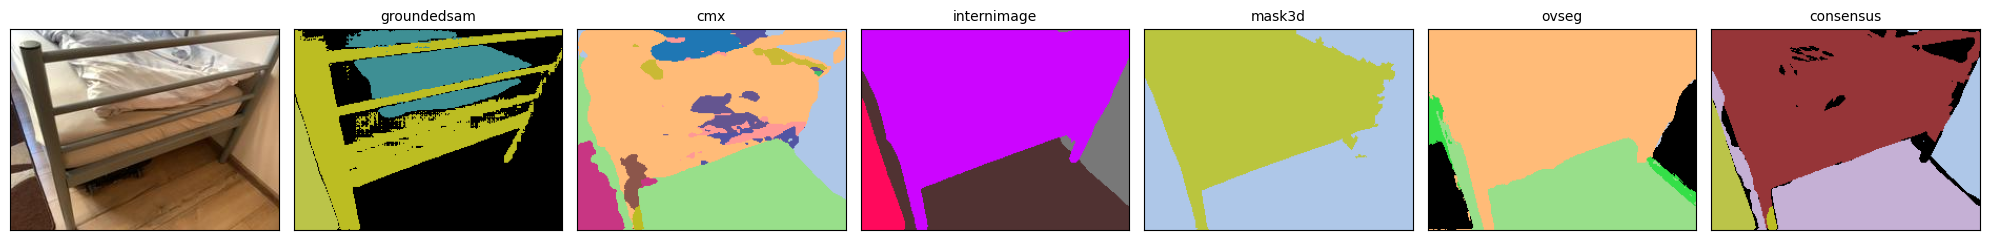

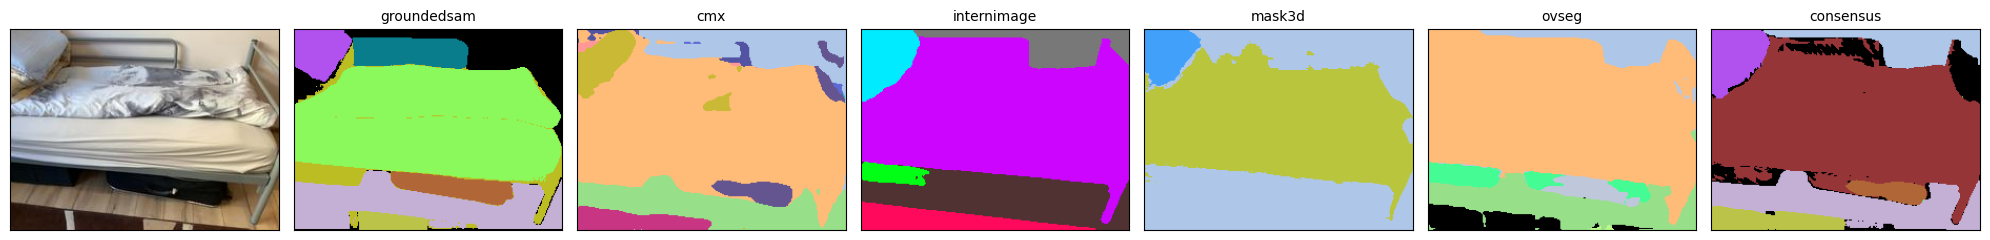

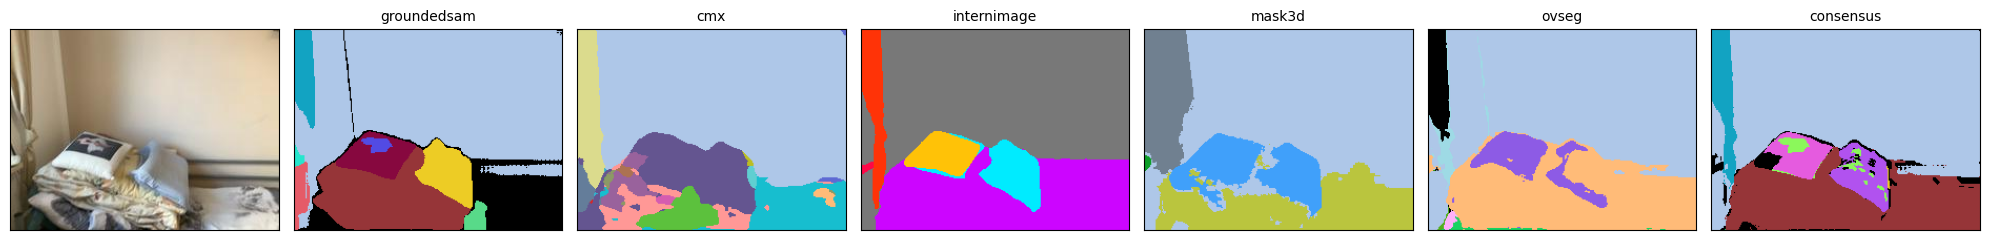

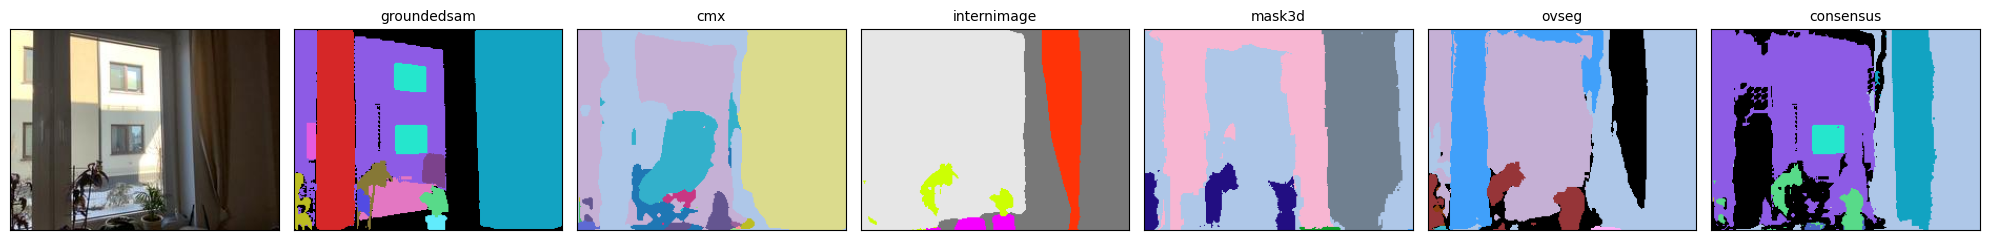

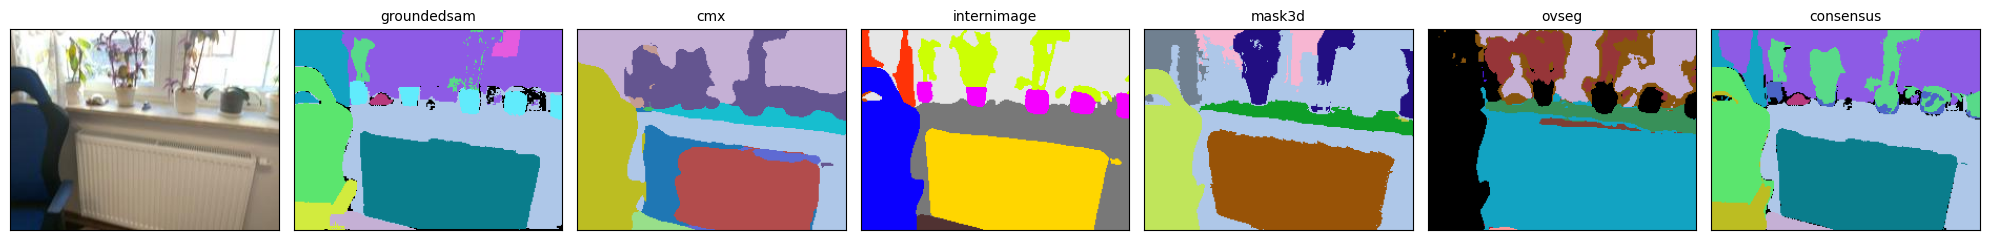

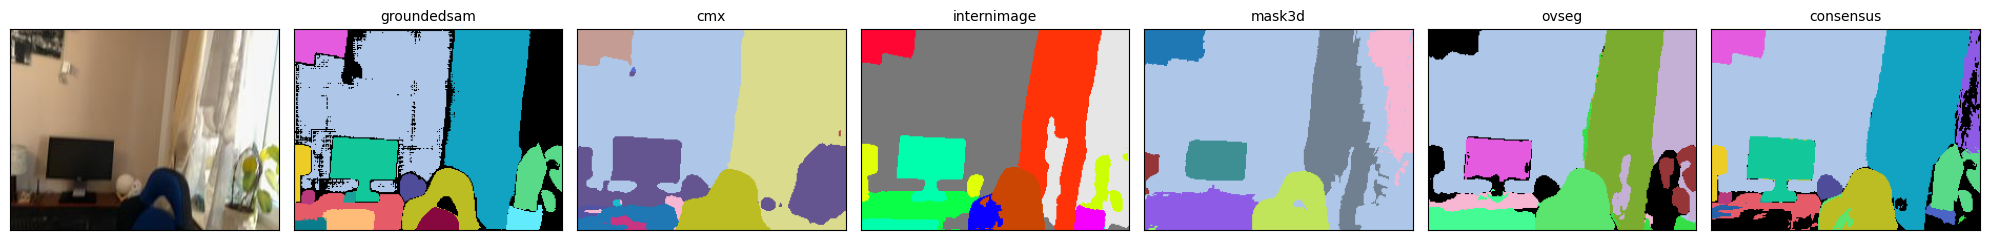

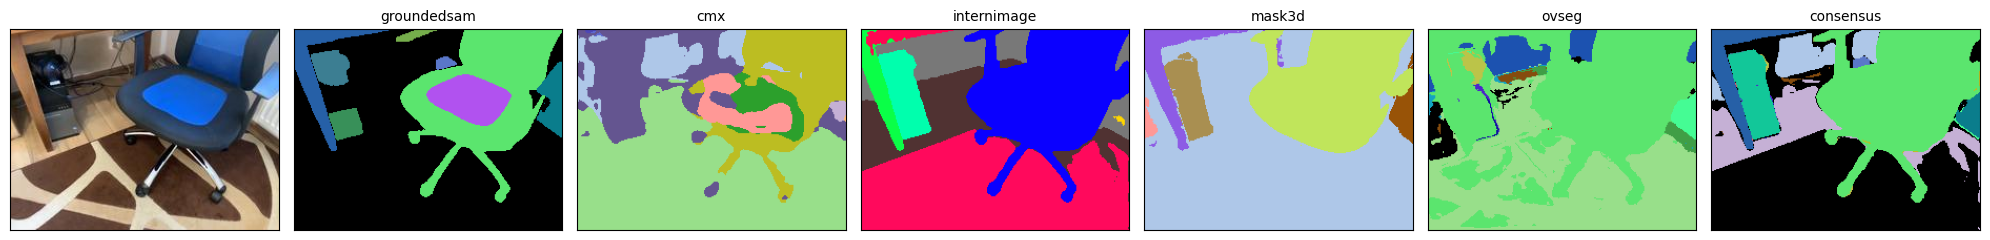

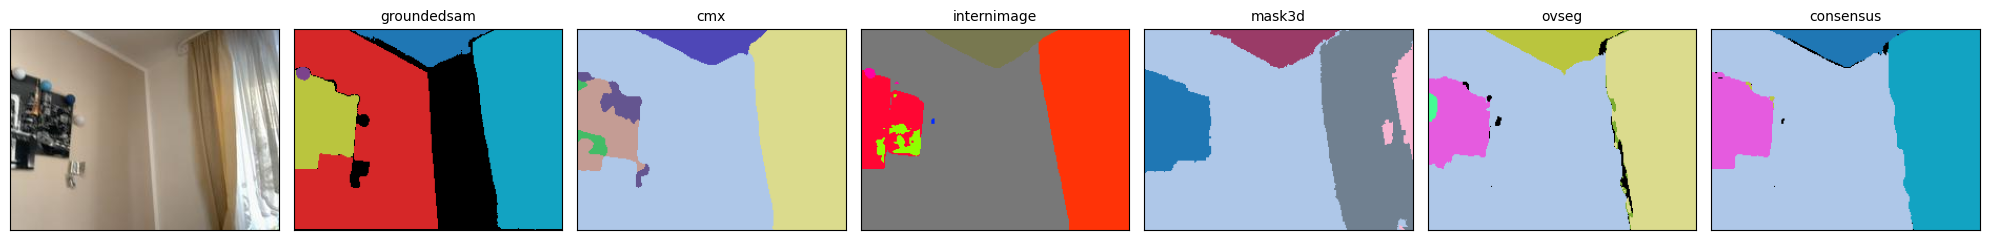

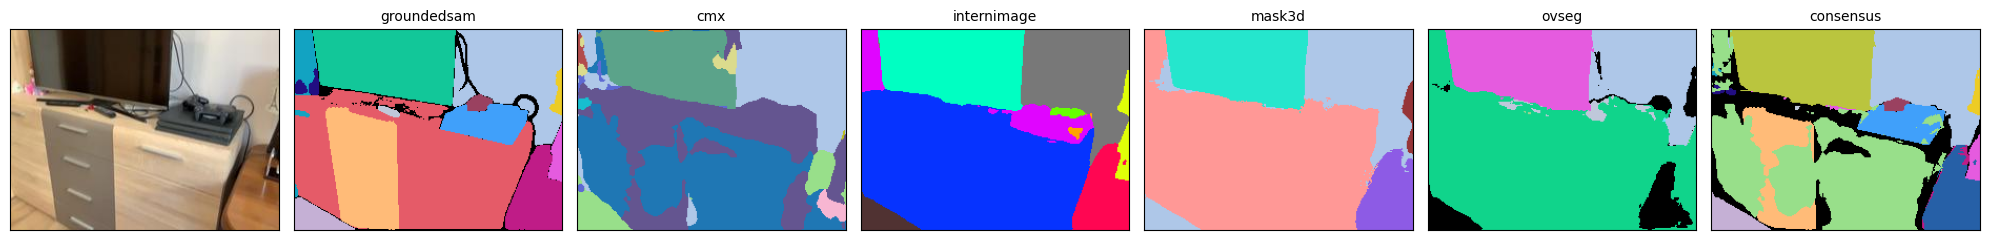

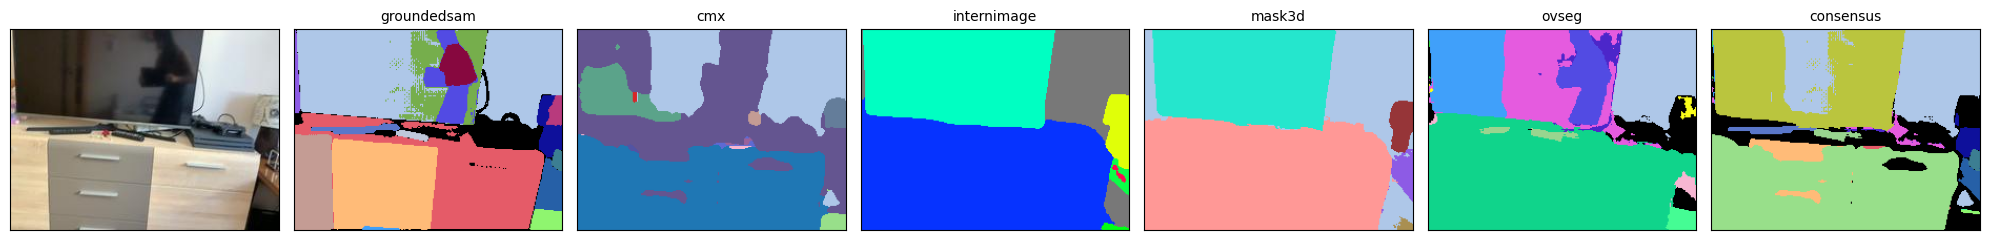

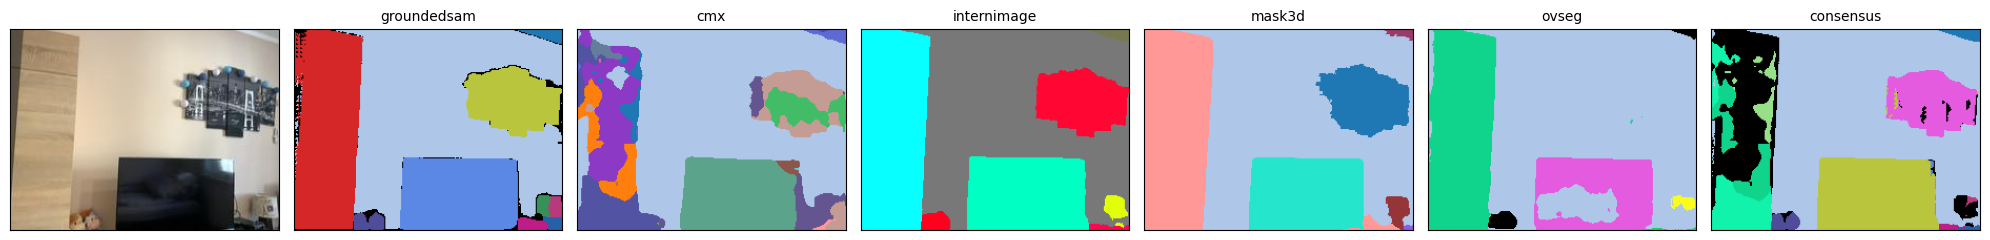

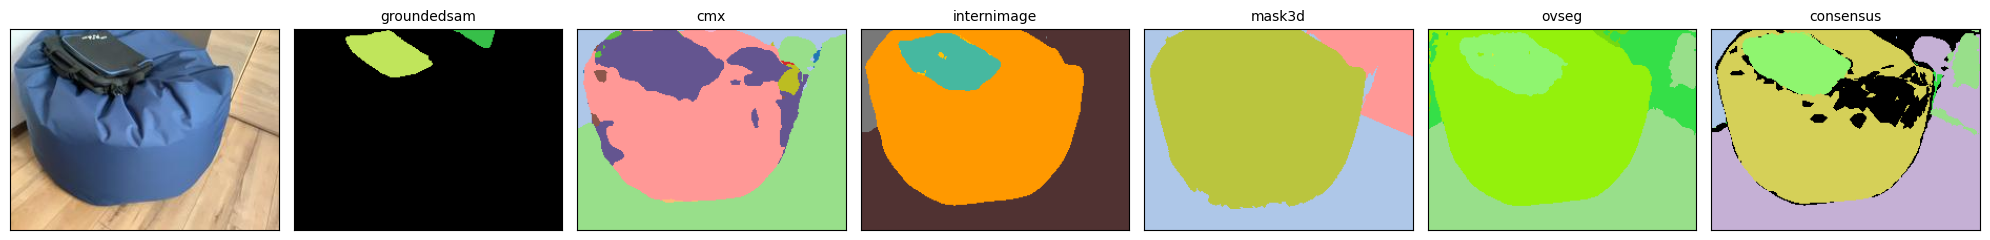

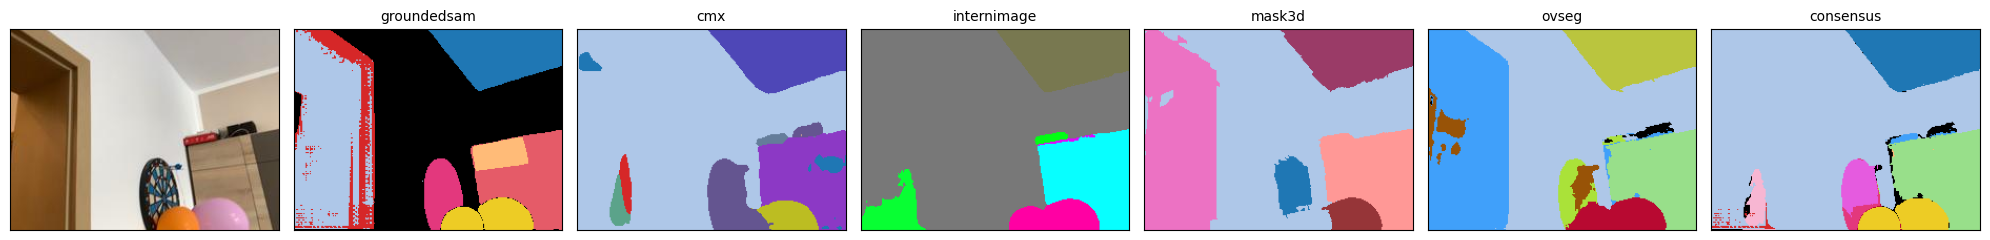

In [8]:
for idx, f in enumerate(image_files):
  if idx % vis_freq == 0:
    
    image = load_image(os.path.join(WORKSPACE_DIR, 'color', f'{f}.jpg'))
    label_frames = []
    for model_folder in model_folders:
        label = load_label(os.path.join(WORKSPACE_DIR, 'intermediate', model_folder, f'{f}.png'))
        label = colorize_label(label, model_folder.split('_')[0])
        label_frames.append(label)   
    
    fig, ax = plt.subplots(1, len(label_frames)+1, figsize=(20, 10))
    ax[0].imshow(image)
    for jdx, label_frame in enumerate(label_frames):
        name = 'consensus' if 'consensus' in model_folders[jdx] else model_folders[jdx].split('_')[1]
        ax[jdx+1].imshow(label_frame)
        ax[jdx+1].set_title(name, fontsize=10)
        
    # remove xticks
    for axi in ax:
        axi.set_xticks([])
        axi.set_yticks([])
    plt.tight_layout()
    plt.show()  
      
    
